In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Load data

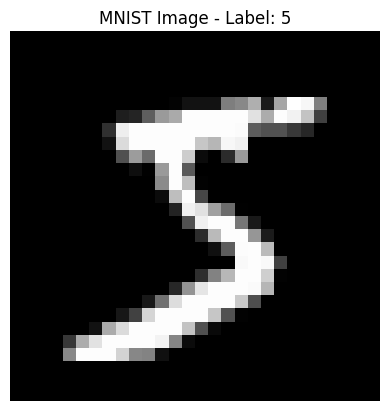

In [3]:
plt.imshow(train_images[0], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f'MNIST Image - Label: {train_labels[0]}')
plt.axis('off')  # Turn off axis labels
plt.show()

In [4]:
train_images = train_images.reshape((60000,28,28,1)) # BATCH SIZE, HEIGHT, WIDTH, CHANNELS
train_images = train_images.astype('float32')/255 # NORMALIZE DATA TO 0-1 RANGE (GREYSCALE) 

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

In [5]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels) # ONE-HOT ENCODE LABELS
test_labels = to_categorical(test_labels)

In [6]:
INPUT_SHAPE = (28,28,1) # HEIGHT, WIDTH, CHANNELS

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten()) # FLATTEN OUTPUT OF CONV LAYER TO FEED INTO DENSE LAYER
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) # OUTPUT LAYER WITH 10 OUTPUTS (1 PER CLASS)

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1787 - accuracy: 0.9436
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0481 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0324 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0195 - accuracy: 0.9938


In [9]:
model.summary()

# TEST METRICS:

# model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

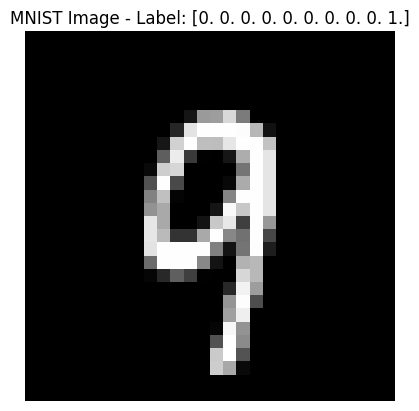

In [10]:
# SAMPLE
import random

test_image_index = random.randrange(0, len(test_images))
plt.imshow(test_images[test_image_index], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f'MNIST Image - Label: {test_labels[test_image_index]}')
plt.axis('off') 
plt.show()

In [11]:
print(f"Model Predicts that the number is a: {np.argmax(model.predict(test_images[test_image_index].reshape(1,28,28,1)))}")

1/1 [==============================] - 0s 48ms/step
Model Predicts that the number is a: 9
